# Data loading

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

X = mnist.data[:1000]
y = mnist.target[:1000]

X.shape

(1000, 784)

# Features selection with chi square

In [2]:
from sklearn.feature_selection import SelectKBest, chi2

features = []

for i in range(1, 8):
    features.append(SelectKBest(chi2, k = i*100).fit_transform(X, y))

In [3]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform, randint

estimator = SVC()

param_distributions = {
    'kernel': ['linear', 'poly', 'rbf','sigmoid'],
    'C': uniform(0.01, 1000),
    'degree': randint(1, 6),
    'gamma': uniform(0.01, 100)
}

scores = []

for i in range(1, 8):

    X_new = features[i-1]

    clf = RandomizedSearchCV(
        estimator=estimator,
        param_distributions=param_distributions,
        n_iter=10,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1,
        random_state=42

    )

    search = clf.fit(X_new, y)

    scores.append(search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


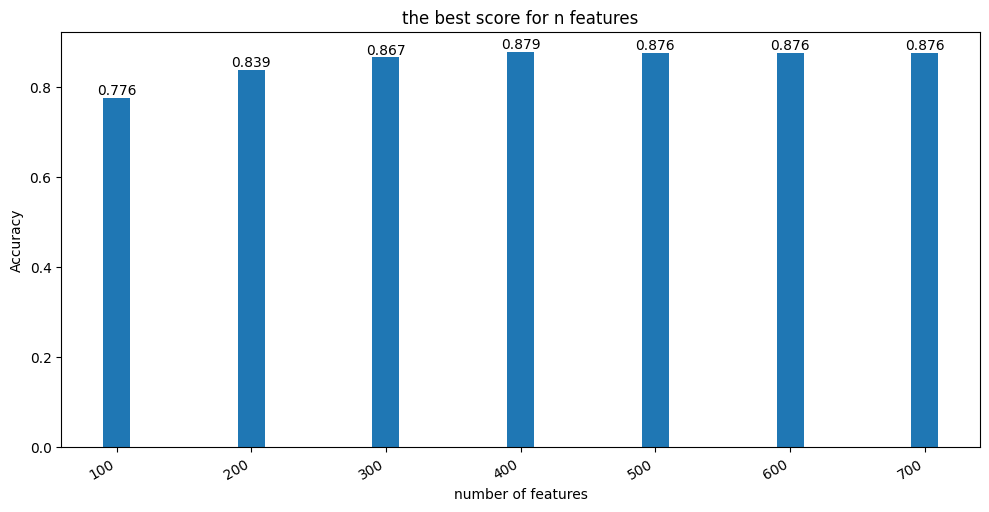

In [4]:
import matplotlib.pyplot as plt

xs = [i*100 for i in range(1, 8)]

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(xs, scores, width=20)
ax.set_ylabel('Accuracy')
ax.set_xlabel('number of features')

for i, s in enumerate(scores):
    ax.text(xs[i], s, str(round(s, 3)), ha='center', va='bottom')

fig.autofmt_xdate()
plt.tight_layout()
plt.title('the best score for n features')
plt.show()

# Features selction with mutual information

In [5]:
from sklearn.feature_selection import mutual_info_classif
from IPython.display import display
from functools import partial

params = {
    'discrete_features': True,
    'n_neighbors':5,
    'random_state':42,
    'n_jobs':-1
}

mutual_info_classif_with_params = partial(mutual_info_classif, **params)

features = []

X = mnist.data[:1000]
y = mnist.target[:1000]

for i in range(1, 8):
    features.append(SelectKBest(mutual_info_classif_with_params, k = i*100).fit_transform(X, y))

In [6]:
scores = []

for i in range(1, 8):

    X_new = features[i-1]

    clf = RandomizedSearchCV(
        estimator=estimator,
        param_distributions=param_distributions,
        n_iter=10,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1,
        random_state=42

    )

    search = clf.fit(X_new, y)

    scores.append(search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


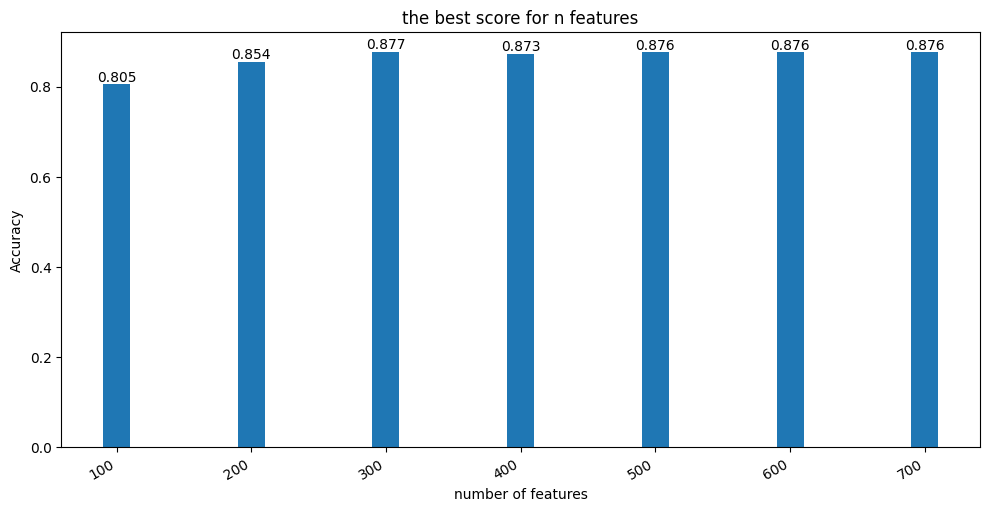

In [7]:
xs = [i*100 for i in range(1, 8)]

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(xs, scores, width=20)
ax.set_ylabel('Accuracy')
ax.set_xlabel('number of features')

for i, s in enumerate(scores):
    ax.text(xs[i], s, str(round(s, 3)), ha='center', va='bottom')

fig.autofmt_xdate()
plt.tight_layout()
plt.title('the best score for n features')
plt.show()

In [ ]:
from sklearn.feature_selection import f_classif

features = []

X = mnist.data[:1000]
y = mnist.target[:1000]

for i in range(1, 8):
    features.append(SelectKBest(f_classif, k = i*100).fit_transform(X, y))

/home/nykfer/data-science/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  40  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61
  62  63  64  65  80  81  82  83  84  85  86  87  88  89 108 109 110 111
 112 113 114 115 137 138 139 140 141 142 167 168 169 170 196 197 224 225
 251 252 279 280 307 308 309 335 336 337 363 364 365 391 392 393 394 419
 420 421 422 447 448 449 475 476 477 502 503 504 505 530 531 532 533 558
 559 560 561 587 588 589 615 616 617 643 644 645 669 670 671 672 673 674
 697 698 699 700 701 702 725 726 727 728 729 730 750 751 752 753 754 755
 756 757 758 759 760 776 777 778 779 780 781 782 783] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/nykfer/data-science/.venv/lib/python3.12/site-pa

In [20]:
scores = []

for i in range(1, 8):

    X_new = features[i-1]

    clf = RandomizedSearchCV(
        estimator=estimator,
        param_distributions=param_distributions,
        n_iter=10,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1,
        random_state=42

    )

    search = clf.fit(X_new, y)

    scores.append(search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


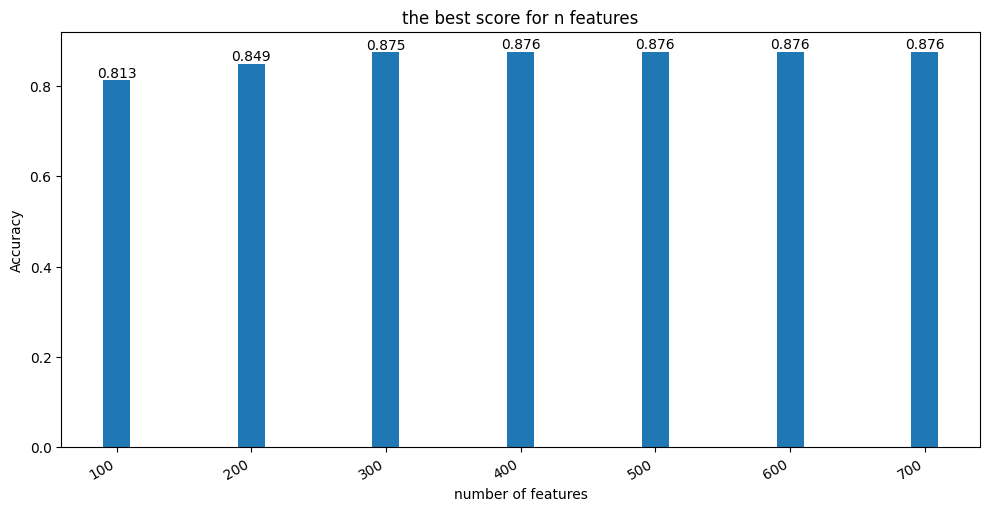

In [21]:
xs = [i*100 for i in range(1, 8)]

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(xs, scores, width=20)
ax.set_ylabel('Accuracy')
ax.set_xlabel('number of features')

for i, s in enumerate(scores):
    ax.text(xs[i], s, str(round(s, 3)), ha='center', va='bottom')

fig.autofmt_xdate()
plt.tight_layout()
plt.title('the best score for n features')
plt.show()